## Load and Data Confimation

In [15]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head()

,user_id,session_id,session_duration,decision_count,undo_count,error_rate,break_taken,time_of_day,fatigue_score,fatigue_level
0,1,0,120,105,11,0.10,0,Evening,83.4,High
1,1,1,72,32,6,0.06,0,Evening,37.4,Medium
2,1,2,136,15,14,0.14,0,Afternoon,53.8,Medium
3,1,3,138,89,7,0.31,0,Morning,82.9,High
4,1,4,49,73,8,0.33,0,Morning,50.4,Medium


In [16]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735 entries, 0 to 1734
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           1735 non-null   int64  
 1   session_id        1735 non-null   int64  
 2   session_duration  1735 non-null   int64  
 3   decision_count    1735 non-null   int64  
 4   undo_count        1735 non-null   int64  
 5   error_rate        1735 non-null   float64
 6   break_taken       1735 non-null   int64  
 7   time_of_day       1735 non-null   object 
 8   fatigue_score     1735 non-null   float64
 9   fatigue_level     1735 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 135.7+ KB


In [17]:
df.describe()

,user_id,session_id,session_duration,decision_count,undo_count,error_rate,break_taken,fatigue_score
count,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000,1735.000000
mean,251.094524,1.420173,94.132565,61.899135,9.605764,0.199885,0.394813,52.918386
std,145.858360,1.237322,48.477153,33.177560,5.754610,0.113876,0.488951,21.196988
min,1.000000,0.000000,10.000000,5.000000,0.000000,0.000000,0.000000,-4.700000
25%,122.500000,0.000000,52.500000,34.000000,5.000000,0.100000,0.000000,37.400000
50%,252.000000,1.000000,92.000000,62.000000,10.000000,0.200000,0.000000,53.500000
75%,379.000000,2.000000,136.000000,90.000000,15.000000,0.300000,1.000000,68.000000
max,500.000000,4.000000,179.000000,119.000000,19.000000,0.400000,1.000000,107.600000


In [18]:
df.fatigue_level.value_counts()

fatigue_level
Medium    825
High      657
Low       253
Name: count, dtype: int64

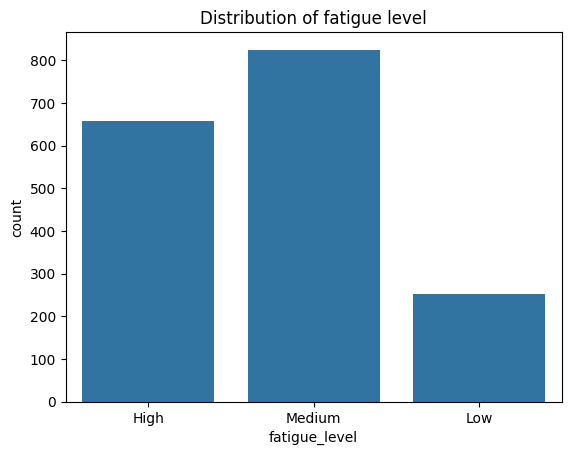

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x="fatigue_level", data=df)
plt.title("Distribution of fatigue level")
plt.show()

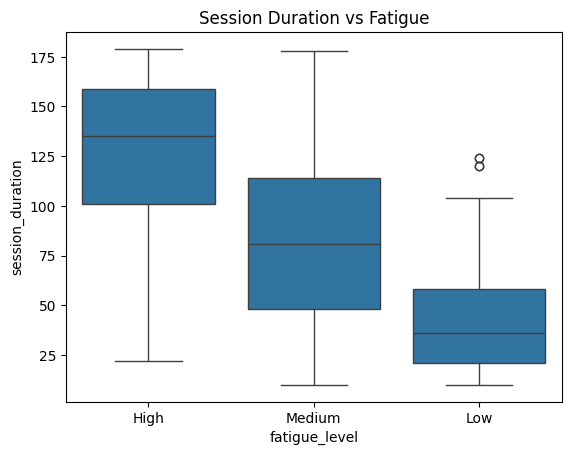

In [20]:
sns.boxplot(x='fatigue_level', y='session_duration', data=df)
plt.title("Session Duration vs Fatigue")
plt.show()


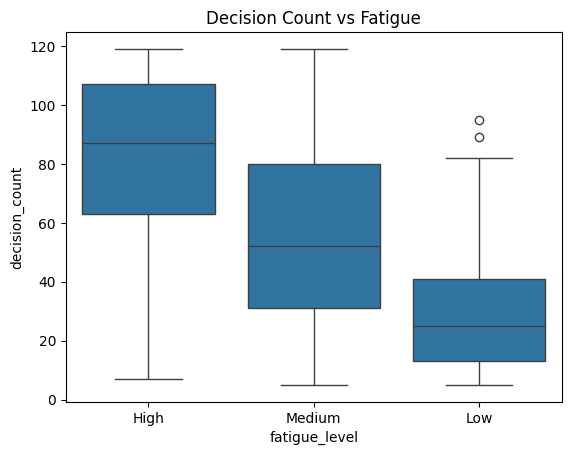

In [21]:
sns.boxplot(x='fatigue_level', y='decision_count', data=df)
plt.title("Decision Count vs Fatigue")
plt.show()


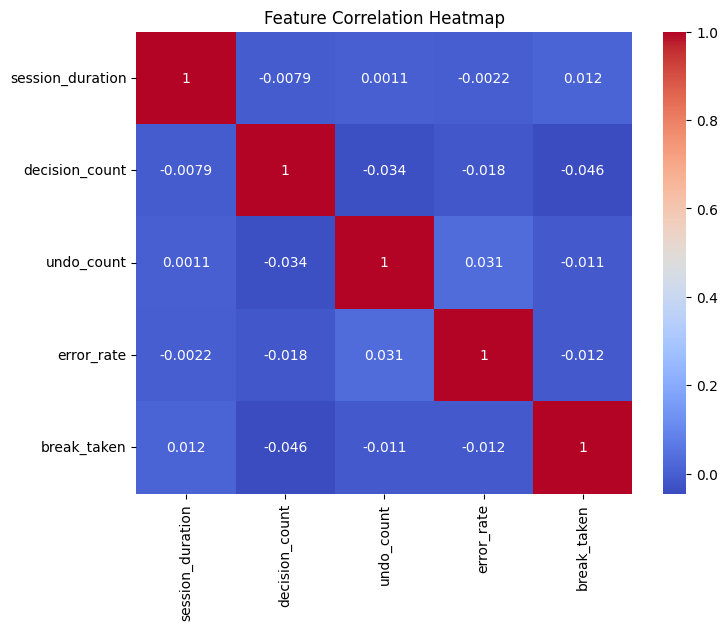

In [34]:
plt.figure(figsize=(8,6))
corr = df[['session_duration','decision_count','undo_count','error_rate','break_taken']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [22]:
df['break_taken'] = df['break_taken'].astype(int)

df = pd.get_dummies(df, columns=['time_of_day'], drop_first=True)